<a href="https://colab.research.google.com/github/Hanan-Aref03/Machine_Learning_Projects/blob/main/Hanan_Aref_Project_Machine_Translation_(ENG_FR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Machine Translation Using a Seq2Seq Architecture
© 2024, Zaka AI, Inc. All Rights Reserved.

---
The goal of this colab is to get you more familiar with the Seq2Seq models and their challenges. For this reason, you will be working on machine translation problem where we would have a sentence as input (in english), and the output is gonna be the translated sentence (in french). So just like what happens with Google Translate.


**Just to give you a heads up:** We won't be having a model performing like Google translate, but at least we will have an idea about how Google Translate works and the challenges that exist with a translation problem.  

## Importing Libraries

We start by importing numpy and pandas and then we can add the rest

In [ ]:
import pandas as pd
import numpy as np

We clone the github repository where our data exists. Here is the github link: https://github.com/zaka-ai/machine_learning_certification/tree/main/Challenge%207

In [ ]:
!git clone https://github.com/zaka-ai/machine_learning_certification.git

Cloning into 'machine_learning_certification'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 43 (delta 10), reused 10 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (43/43), 43.23 MiB | 17.55 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [ ]:
%cd machine_learning_certification/Challenge 7
%cd Challenge\ 7
!ls

/content/machine_learning_certification/Challenge 7
[Errno 2] No such file or directory: 'Challenge 7'
/content/machine_learning_certification/Challenge 7
en.csv	fr.csv


## Getting the data

In [ ]:
#Test Your Zaka
# Load the English sentences
english = pd.read_csv("en.csv", header=None, names=["English"])

# Load the French sentences
french = pd.read_csv("fr.csv", header=None, names=["French"])

# Display the first few rows of each dataframe to verify
print("English Dataset:")
print(english.head())

print("\nFrench Dataset:")
print(french.head())


English Dataset:
                                             English
0  new jersey is sometimes quiet during autumn , ...
1  the united states is usually chilly during jul...
2  california is usually quiet during march , and...
3  the united states is sometimes mild during jun...
4  your least liked fruit is the grape , but my l...

French Dataset:
                                              French
0  new jersey est parfois calme pendant l' automn...
1  les états-unis est généralement froid en juill...
2  california est généralement calme en mars , et...
3  les états-unis est parfois légère en juin , et...
4  votre moins aimé fruit est le raisin , mais mo...


We read the english sentences in a dataframe named "english", and the french sentences in a dataframe named "french"

In [ ]:
#Test Your Zaka (English)
import pandas as pd

# Load the English and French datasets
english = pd.read_csv("en.csv", header=None, names=["English"])
french = pd.read_csv("fr.csv", header=None, names=["French"])


In [ ]:
#Test Your Zaka (French)

**How many sentences does each of the files contain?**

In [ ]:
#Test Your Zaka
# Count the number of sentences in each dataframe
num_english_sentences = len(english)
num_french_sentences = len(french)

print(f"Number of sentences in the English file: {num_english_sentences}")
print(f"Number of sentences in the French file: {num_french_sentences}")


Number of sentences in the English file: 137860
Number of sentences in the French file: 137860


Now let us concatenate the 2 dataframes into one dataframe that we call **df** where one column has the english senetnces and the other has the french sentences

In [ ]:
#Test Your Zaka
# Concatenate the English and French dataframes into one
df = pd.concat([english, french], axis=1)

# Display the first few rows to confirm
print(df.head())

                                             English  \
0  new jersey is sometimes quiet during autumn , ...   
1  the united states is usually chilly during jul...   
2  california is usually quiet during march , and...   
3  the united states is sometimes mild during jun...   
4  your least liked fruit is the grape , but my l...   

                                              French  
0  new jersey est parfois calme pendant l' automn...  
1  les états-unis est généralement froid en juill...  
2  california est généralement calme en mars , et...  
3  les états-unis est parfois légère en juin , et...  
4  votre moins aimé fruit est le raisin , mais mo...  


Let's name the columns as **English** and **French** so that we access them easier.

In [ ]:
#Test Your Zaka
# Rename the columns for easier access
df.columns = ["English", "French"]

# Display the updated dataframe
print(df.head())


                                             English  \
0  new jersey is sometimes quiet during autumn , ...   
1  the united states is usually chilly during jul...   
2  california is usually quiet during march , and...   
3  the united states is sometimes mild during jun...   
4  your least liked fruit is the grape , but my l...   

                                              French  
0  new jersey est parfois calme pendant l' automn...  
1  les états-unis est généralement froid en juill...  
2  california est généralement calme en mars , et...  
3  les états-unis est parfois légère en juin , et...  
4  votre moins aimé fruit est le raisin , mais mo...  


Pick a sentence and print it in both languages

In [ ]:
#Test Your Zaka
# Pick a specific row (e.g., the first sentence)
row_index = 0  # Change this index to select a different sentence

# Print the sentence in both languages
print(f"English: {df.loc[row_index, 'English']}")
print(f"French: {df.loc[row_index, 'French']}")


English: new jersey is sometimes quiet during autumn , and it is snowy in april .
French: new jersey est parfois calme pendant l' automne , et il est neigeux en avril .


##Cleaning Data

The data that we have is almost clean as we can see, we just need to remove the punctuations inside of it.

In [ ]:
#Test Your Zaka
import string
# Function to remove punctuation from a sentence
def remove_punctuation(sentence):
    return sentence.translate(str.maketrans('', '', string.punctuation))

# Remove punctuation from both English and French columns
df['English'] = df['English'].apply(remove_punctuation)
df['French'] = df['French'].apply(remove_punctuation)


Make sure that the punctuation is removed by printing the example that you printed earlier.

In [ ]:
#Test Your Zaka
# Display the first few rows to verify
print(df.head())

# Print the cleaned example sentence
print(f"Cleaned English: {df.loc[row_index, 'English']}")
print(f"Cleaned French: {df.loc[row_index, 'French']}")


                                             English  \
0  new jersey is sometimes quiet during autumn  a...   
1  the united states is usually chilly during jul...   
2  california is usually quiet during march  and ...   
3  the united states is sometimes mild during jun...   
4  your least liked fruit is the grape  but my le...   

                                              French  
0  new jersey est parfois calme pendant l automne...  
1  les étatsunis est généralement froid en juille...  
2  california est généralement calme en mars  et ...  
3  les étatsunis est parfois légère en juin  et i...  
4  votre moins aimé fruit est le raisin  mais mon...  
Cleaned English: new jersey is sometimes quiet during autumn  and it is snowy in april 
Cleaned French: new jersey est parfois calme pendant l automne  et il est neigeux en avril 


##Exploring the Data

Add a column **ENG Length** to the dataset that shows how many words does a sentence contain, and do the same for french in a column called **FR Length**

In [ ]:
#Test Your Zaka
# Function to calculate the word count in a sentence
def word_count(sentence):
    return len(sentence.split())


In [ ]:
#Test Your Zaka
# Add new columns for word count in English and French
df['ENG Length'] = df['English'].apply(word_count)
df['FR Length'] = df['French'].apply(word_count)

# Display the updated dataframe to verify
print(df.head())


                                             English  \
0  new jersey is sometimes quiet during autumn  a...   
1  the united states is usually chilly during jul...   
2  california is usually quiet during march  and ...   
3  the united states is sometimes mild during jun...   
4  your least liked fruit is the grape  but my le...   

                                              French  ENG Length  FR Length  
0  new jersey est parfois calme pendant l automne...          13         14  
1  les étatsunis est généralement froid en juille...          15         13  
2  california est généralement calme en mars  et ...          13         13  
3  les étatsunis est parfois légère en juin  et i...          14         13  
4  votre moins aimé fruit est le raisin  mais mon...          14         14  


Visualize the distribution of the lengths of english sentences and french sentences.

In [ ]:
#Test Your Zaka
import matplotlib.pyplot as plt
import seaborn as sns


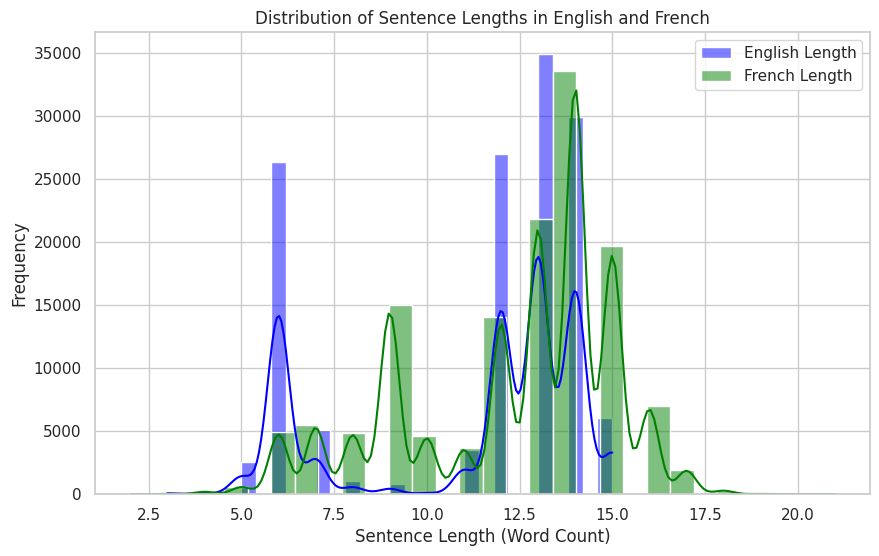

In [ ]:
#Test Your Zaka
# Set the style for seaborn
sns.set(style="whitegrid")

# Create a figure for plotting
plt.figure(figsize=(10, 6))

# Plot histogram for the English sentence lengths
sns.histplot(df['ENG Length'], kde=True, color="blue", label="English Length", bins=30)

# Plot histogram for the French sentence lengths
sns.histplot(df['FR Length'], kde=True, color="green", label="French Length", bins=30)

# Add labels and title
plt.title('Distribution of Sentence Lengths in English and French')
plt.xlabel('Sentence Length (Word Count)')
plt.ylabel('Frequency')

# Show the legend
plt.legend()

# Display the plot
plt.show()


Above we have a combined histogram with Kernel Density Estimation (KDE) for both English and French sentence lengths. The blue histogram will represent the English sentences, and the green histogram will represent the French sentences.

Get the maximum length of an english sentence and the maximum length of a french sentence.

In [ ]:
#Test Your Zaka
# Get the maximum length of English and French sentences
max_english_length = df['ENG Length'].max()
max_french_length = df['FR Length'].max()

# Print the results
print(f"Maximum length of an English sentence: {max_english_length} words")
print(f"Maximum length of a French sentence: {max_french_length} words")


Maximum length of an English sentence: 15 words
Maximum length of a French sentence: 21 words


Maximum length of an English sentence: 15 words
Maximum length of a French sentence: 21 words


##Preprocessing the Data

In order for the data to be fed to the model, it has to be tokenized and padded.

####Tokenization

**To tokenize english and french sentences, we can use only one tokenizer. True or False?**

The statement is **False** because to tokenize English and French sentences, you typically need separate tokenizers for each language because each language has its own vocabulary and rules for tokenization. Although both languages share some similarities, their syntax, structure, and grammar differ, so it's essential to handle them separately.

For example, English might require tokenizing words like "I'm" into ["I", "am"], while French might have contractions like "j'ai" that need to be tokenized properly.

Thus, you should use **one tokenizer for English** and a **separate tokenizer for French**.

Tokenize the sentences that we have.

In [ ]:
#Test Your Zaka
!pip install tensorflow
# Instead of importing from 'keras', import from 'tensorflow.keras'
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences

In [ ]:
#Test Your Zaka

# Initialize the tokenizer for English
english_tokenizer = Tokenizer()

# Initialize the tokenizer for French
french_tokenizer = Tokenizer()

# Fit the tokenizers on the English and French data
english_tokenizer.fit_on_texts(df['English'])
french_tokenizer.fit_on_texts(df['French'])

# Tokenize the English and French sentences
english_sequences = english_tokenizer.texts_to_sequences(df['English'])
french_sequences = french_tokenizer.texts_to_sequences(df['French'])

# Display the first few tokenized sentences
print("English Tokenized Sequences:")
print(english_sequences[:5])

print("\nFrench Tokenized Sequences:")
print(french_sequences[:5])



English Tokenized Sequences:
[[17, 23, 1, 8, 67, 4, 39, 7, 3, 1, 55, 2, 44], [5, 20, 21, 1, 9, 62, 4, 43, 7, 3, 1, 9, 51, 2, 45], [22, 1, 9, 67, 4, 38, 7, 3, 1, 9, 68, 2, 34], [5, 20, 21, 1, 8, 64, 4, 34, 7, 3, 1, 57, 2, 42], [29, 12, 16, 13, 1, 5, 82, 6, 30, 12, 16, 1, 5, 83]]

French Tokenized Sequences:
[[34, 33, 1, 8, 66, 36, 11, 24, 6, 3, 1, 111, 2, 49], [4, 31, 1, 12, 19, 2, 48, 6, 3, 94, 68, 2, 50], [100, 1, 12, 66, 2, 44, 6, 3, 1, 12, 21, 2, 40], [4, 31, 1, 8, 268, 2, 40, 6, 3, 102, 19, 2, 47], [39, 13, 14, 16, 1, 10, 81, 5, 38, 13, 14, 1, 7, 82]]


**How many unique words do we have in english and in french?**

In [ ]:
#Test Your Zaka
# Number of unique words (vocabulary size)
num_unique_words_eng = len(english_tokenizer.word_index)  # English vocabulary size
num_unique_words_fr = len(french_tokenizer.word_index)    # French vocabulary size

print(f"Number of unique words in English: {num_unique_words_eng}")
print(f"Number of unique words in French: {num_unique_words_fr}")


Number of unique words in English: 199
Number of unique words in French: 344


####Padding

**What should be the length of the sequences that we have after padding?**

The length of the sequences after padding should be equal to the maximum sentence length in the dataset. This ensures that all sentences in the dataset, whether English or French, have the same length and can be fed into the model efficiently.

Here's how to determine the padding length:
English sequences should be padded to the maximum length of an English sentence.
French sequences should be padded to the maximum length of a French sentence.

In [ ]:
#Calculate Maximum Length
max_length_eng = max([len(seq) for seq in english_sequences])
max_length_fr = max([len(seq) for seq in french_sequences])

print(f"Maximum length of English sentences: {max_length_eng}")
print(f"Maximum length of French sentences: {max_length_fr}")


Maximum length of English sentences: 15
Maximum length of French sentences: 21


Perform padding on the sequences that we have.

In [ ]:
#Test Your Zaka
#maxlen: Specifies the length to pad each sequence. This is set to the maximum sentence length for English and French, respectively.
#padding='post': Pads zeros at the end of each sequence to ensure uniform length.

from keras.preprocessing.sequence import pad_sequences

# Define the maximum lengths for English and French sequences
max_length_eng = max([len(seq) for seq in english_sequences])
max_length_fr = max([len(seq) for seq in french_sequences])

# Perform padding on English sequences
english_padded = pad_sequences(english_sequences, maxlen=max_length_eng, padding='post')

# Perform padding on French sequences
french_padded = pad_sequences(french_sequences, maxlen=max_length_fr, padding='post')

# Print examples to verify padding
print("Example of padded English sequence:", english_padded[0])
print("Example of padded French sequence:", french_padded[0])



Example of padded English sequence: [17 23  1  8 67  4 39  7  3  1 55  2 44  0  0]
Example of padded French sequence: [ 34  33   1   8  66  36  11  24   6   3   1 111   2  49   0   0   0   0
   0   0   0]


##Modeling

After preprrocessing the data, we can build our model. Start by building a baseline architecture relying on one directional RNNs, LSTMs, or GRUs. It will be good to lookup how to build Seq2Seq models, there are some new layers that will help you like RepeatVector and TimeDistributed.

In [ ]:
#Test Your Zaka
from keras.models import Sequential
from keras.layers import Embedding, LSTM, GRU, Dense, RepeatVector, TimeDistributed

# Define the size of the vocabulary and embedding dimensions
english_vocab_size = len(english_tokenizer.word_index) + 1
french_vocab_size = len(french_tokenizer.word_index) + 1
embedding_dim = 256
latent_dim = 512

# Build the Seq2Seq model
model = Sequential()

# Encoder: Embedding layer followed by an LSTM layer
model.add(Embedding(input_dim=english_vocab_size, output_dim=embedding_dim, input_length=max_length_eng))
model.add(LSTM(latent_dim, return_sequences=False))  # Outputs the latent representation (context vector)

# RepeatVector: Copies the context vector for every timestep in the output
model.add(RepeatVector(max_length_fr))

# Decoder: LSTM layer that processes the repeated context vector
model.add(LSTM(latent_dim, return_sequences=True))

# TimeDistributed: Applies a Dense layer to each timestep in the decoder output
model.add(TimeDistributed(Dense(french_vocab_size, activation='softmax')))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Reshape the French target sequences for sparse categorical cross-entropy
#french_padded = french_padded.reshape(french_padded.shape[0], french_padded.shape[1], 1)

# Train the model
#model.fit(english_padded, french_padded, batch_size=64, epochs=20, validation_split=0.2)


Compile and train the model.
**FYI:** While specifying the architecture of your model and the number of epochs for training, keeep in your mind that your model might take A LOT of time to train.

In [ ]:
#Test Your Zaka
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, GRU, Dense, RepeatVector, TimeDistributed

# Define the model architecture
def create_model(english_vocab_size, french_vocab_size, max_length_eng, max_length_fr, embedding_dim=128, latent_dim=256):
    # Encoder
    encoder_input = Input(shape=(max_length_eng,))
    encoder_embedding = Embedding(input_dim=english_vocab_size, output_dim=embedding_dim, mask_zero=True)(encoder_input)
     # Fix: Unpack all three returned values from LSTM
    encoder_output, state_h, state_c = LSTM(latent_dim, return_state=True)(encoder_embedding)
    encoder_state = [state_h, state_c] # Combine hidden and cell state into a list


    # Decoder
    decoder_input = RepeatVector(max_length_fr)(encoder_output)
    decoder_output = LSTM(latent_dim, return_sequences=True)(decoder_input)
    decoder_dense = TimeDistributed(Dense(french_vocab_size, activation='softmax'))(decoder_output)

    # Model
    model = Model(inputs=encoder_input, outputs=decoder_dense)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model
model = create_model(
    english_vocab_size=len(english_tokenizer.word_index) + 1,
    french_vocab_size=len(french_tokenizer.word_index) + 1,
    max_length_eng=max_length_eng,
    max_length_fr=max_length_fr
)

# Print the model summary
model.summary()

# Train the model
# Ensure French target data is reshaped for sparse_categorical_crossentropy
french_padded = french_padded.reshape(french_padded.shape[0], french_padded.shape[1], 1)

# Train the model
history = model.fit(
    english_padded,
    french_padded,
    batch_size=64,
    epochs=10,  # Use fewer epochs for efficiency
    validation_split=0.2
)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 15)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_2 (Embedding)   │ (None, 15, 128)        │         25,600 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ not_equal_1 (NotEqual)    │ (None, 15)             │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_3 (LSTM)             │ [(None, 256), (None,   │        394,240 │ embedding_2[0][0],     │
│                           │ 256), (None, 256)]     │                │ not_equal_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ repeat_vector_1           │ (None, 21, 256)        │              0 │ lstm_3[0][0]           │
│ (RepeatVector)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_4 (LSTM)             │ (None, 21, 256)        │        525,312 │ repeat_vector_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ time_distributed_1        │ (None, 21, 345)        │         88,665 │ lstm_4[0][0]           │
│ (TimeDistributed)         │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,033,817 (3.94 MB)

 Trainable params: 1,033,817 (3.94 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 749s 430ms/step - accuracy: 0.5687 - loss: 1.9026 - val_accuracy: 0.7663 - val_loss: 0.7798
Epoch 2/10
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 771s 447ms/step - accuracy: 0.7935 - loss: 0.6781 - val_accuracy: 0.8665 - val_loss: 0.4426
Epoch 3/10
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 799s 445ms/step - accuracy: 0.8937 - loss: 0.3537 - val_accuracy: 0.9342 - val_loss: 0.2277
Epoch 4/10
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 753s 417ms/step - accuracy: 0.9460 - loss: 0.1857 - val_accuracy: 0.9551 - val_loss: 0.1484
Epoch 5/10
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 784s 441ms/step - accuracy: 0.9602 - loss: 0.1309 - val_accuracy: 0.9636 - val_loss: 0.1162
Epoch 6/10
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 812s 448ms/step - accuracy: 0.9686 - loss: 0.1016 - val_accuracy: 0.9672 - val_loss: 0.1079
Epoch 7/10
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 771s 447ms/step - accuracy: 0.9737 - loss: 0.0838 - val_accuracy: 0.9728 - val_loss: 0.0901
Epoch 8/10
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 739s 428ms/step - ac

Define a function that gets an input sentence in english and gives the output sentence in the french language.

In [ ]:
#Test Your Zaka
import numpy as np

def translate_sentence(input_sentence, model, english_tokenizer, french_tokenizer, max_length_eng, max_length_fr):
    """
    Translates an English sentence into French using the trained model.

    Args:
        input_sentence (str): The English sentence to translate.
        model (keras.Model): The trained Seq2Seq model.
        english_tokenizer (Tokenizer): Tokenizer for English sentences.
        french_tokenizer (Tokenizer): Tokenizer for French sentences.
        max_length_eng (int): Maximum length of English sentences.
        max_length_fr (int): Maximum length of French sentences.

    Returns:
        str: The translated French sentence.
    """
    # Tokenize and pad the input English sentence
    input_sequence = english_tokenizer.texts_to_sequences([input_sentence])
    input_sequence = pad_sequences(input_sequence, maxlen=max_length_eng, padding='post')

    # Predict the French sentence
    prediction = model.predict(input_sequence)
    predicted_sequence = np.argmax(prediction, axis=-1).flatten()

    # Decode the predicted sequence into words
    french_word_index = {index: word for word, index in french_tokenizer.word_index.items()}
    translated_sentence = ' '.join([french_word_index.get(idx, '') for idx in predicted_sequence if idx > 0])

    return translated_sentence

# Example Usage
english_sentence = "I am happy to help"
translated_sentence = translate_sentence(
    input_sentence=english_sentence,
    model=model,
    english_tokenizer=english_tokenizer,
    french_tokenizer=french_tokenizer,
    max_length_eng=max_length_eng,
    max_length_fr=max_length_fr
)
print("English:", english_sentence)
print("French:", translated_sentence)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
English: I am happy to help
French: je est en en juin


Test the following sentence

In [ ]:
input_sentence = "she is driving the truck"

#Test Your Zaka
# Translate the sentence
translated_sentence = translate_sentence(
    input_sentence=input_sentence,
    model=model,
    english_tokenizer=english_tokenizer,
    french_tokenizer=french_tokenizer,
    max_length_eng=max_length_eng,
    max_length_fr=max_length_fr
)

# Print the result
print("English:", input_sentence)
print("French:", translated_sentence)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
English: she is driving the truck
French: elle aimait le camion


Try to improve your model by modifying the architecture to take into account bidirectionality which is very useful in Machine Translation. Create a new model called model2

In [ ]:
#Test Your Zaka
from keras.layers import Bidirectional

# Define the architecture
model2 = Sequential()

# Encoder: Add a Bidirectional LSTM layer
model2.add(Embedding(input_dim=english_vocab_size, output_dim=256, input_length=max_length_eng))
model2.add(Bidirectional(LSTM(128, return_sequences=False)))

# Repeat the encoded context vector
model2.add(RepeatVector(max_length_fr))

# Decoder: Add Bidirectional LSTM layers
model2.add(Bidirectional(LSTM(128, return_sequences=True)))

# TimeDistributed dense layer for the output
model2.add(TimeDistributed(Dense(french_vocab_size, activation='softmax')))

# Compile the model
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model2.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector_2 (RepeatVector)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_2 (TimeDistributed) │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

compile and train your new model.

In [ ]:
#Test Your Zaka
# Train the model
history2 = model2.fit(
    x=english_padded,
    y=french_padded.reshape(french_padded.shape[0], french_padded.shape[1], 1),
    batch_size=64,
    epochs=10,  # Adjust based on your runtime constraints
    validation_split=0.2
)


##To test new Model
# Translate a sentence
input_sentence = "She is driving the car"
translated_sentence = translate_sentence(
    input_sentence=input_sentence,
    model=model2,
    english_tokenizer=english_tokenizer,
    french_tokenizer=french_tokenizer,
    max_length_eng=max_length_eng,
    max_length_fr=max_length_fr
)

# Print the result
print("English:", input_sentence)
print("French:", translated_sentence)


Epoch 1/10
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 755s 430ms/step - accuracy: 0.6049 - loss: 1.7322 - val_accuracy: 0.8262 - val_loss: 0.6021
Epoch 2/10
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 740s 429ms/step - accuracy: 0.8602 - loss: 0.4841 - val_accuracy: 0.9315 - val_loss: 0.2423
Epoch 3/10
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 708s 409ms/step - accuracy: 0.9391 - loss: 0.2151 - val_accuracy: 0.9462 - val_loss: 0.1818
Epoch 4/10
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 710s 412ms/step - accuracy: 0.9577 - loss: 0.1436 - val_accuracy: 0.9615 - val_loss: 0.1279
Epoch 5/10
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 749s 434ms/step - accuracy: 0.9679 - loss: 0.1064 - val_accuracy: 0.9657 - val_loss: 0.1125
Epoch 6/10
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 802s 434ms/step - accuracy: 0.9740 - loss: 0.0851 - val_accuracy: 0.9727 - val_loss: 0.0909
Epoch 7/10
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 707s 410ms/step - accuracy: 0.9780 - loss: 0.0715 - val_accuracy: 0.9751 - val_loss: 0.0831
Epoch 8/10
1724/1724 ━━━━━━━━━━━━━━━━━━━━ 777s 430ms/step - ac

Define a new function that relies on your new model to make predictions.

In [ ]:
#Test Your Zaka
import numpy as np

def translate_with_model2(input_sentence, model, english_tokenizer, french_tokenizer, max_length_eng, max_length_fr):
    """
    Translate an English sentence to French using the bidirectional model.

    Parameters:
        input_sentence (str): The English sentence to translate.
        model (keras.Model): The trained Seq2Seq model (model2).
        english_tokenizer (Tokenizer): Tokenizer for English sentences.
        french_tokenizer (Tokenizer): Tokenizer for French sentences.
        max_length_eng (int): Maximum length of English sentences after padding.
        max_length_fr (int): Maximum length of French sentences after padding.

    Returns:
        str: Translated French sentence.
    """
    # Tokenize and pad the input sentence
    input_sequence = english_tokenizer.texts_to_sequences([input_sentence])
    input_padded = pad_sequences(input_sequence, maxlen=max_length_eng, padding='post')

    # Make prediction using the model
    prediction = model.predict(input_padded, verbose=0)

    # Get the index of the highest probability word at each time step
    predicted_indices = np.argmax(prediction[0], axis=-1)

    # Convert indices back to words
    reverse_french_word_index = {idx: word for word, idx in french_tokenizer.word_index.items()}
    translated_words = [reverse_french_word_index.get(index, '') for index in predicted_indices if index > 0]

    # Join the words into a sentence
    translated_sentence = ' '.join(translated_words)
    return translated_sentence


In [ ]:
input = "she is driving the truck"

#Test Your Zaka
# Translate using the new model
translated_sentence = translate_with_model2(
    input_sentence=input_sentence,
    model=model2,
    english_tokenizer=english_tokenizer,
    french_tokenizer=french_tokenizer,
    max_length_eng=max_length_eng,
    max_length_fr=max_length_fr
)

# Print the results
print("English Sentence:", input)
print("Translated French Sentence:", translated_sentence)

English Sentence: she is driving the truck
Translated French Sentence: elle conduit la la voiture


**What is another adjustment in terms of architecture that you might be able to do to improve your model?**

To improve your model, you can consider several architectural adjustments. Adding an **attention mechanism** helps the model focus on relevant parts of the input, improving translation quality, especially for longer sentences. **Stacking multiple RNN layers** allows the model to capture more complex features. Using **pretrained embeddings** like GloVe or Word2Vec can boost performance by leveraging linguistic knowledge. You can also try **bidirectional encoders with attention** for better context understanding or even explore **transformer-based models**, which are powerful in translation tasks. **Regularization techniques** like dropout or weight decay can prevent overfitting, and **teacher forcing** improves training by providing actual target outputs during decoder steps. Lastly, **residual connections** and **beam search** or **sampling** during inference can further enhance model stability and translation diversity.

**What are some additional ways that we can do to improve the performance of our model?**

To improve model performance, we can try hyperparameter tuning to find optimal configurations, use data augmentation to increase training data diversity, and implement pretrained models like BERT or GPT for better translation accuracy. Adding an attention mechanism, using ensemble methods, and fine-tuning word embeddings can also boost performance. To prevent overfitting, techniques like dropout, early stopping, and weight decay are useful. Finally, increasing the training dataset or leveraging more labeled translation pairs can help the model generalize better.